In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Dataset overview

In [4]:
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

There are 60000 images in train set.

In [6]:
len(X_test)

10000

There are 10000 images in test set.

In [7]:
X_train[0].shape

(28, 28)

Every sample in the dataset is 28x28 pixels image.

In [8]:
#image is represented as 2-dimensional array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

0 = black, 255 =white

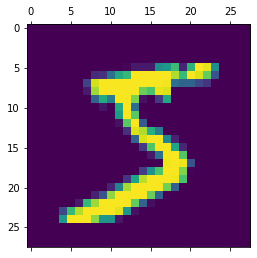

In [9]:
#matplotlib function to plot image from 2D array
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

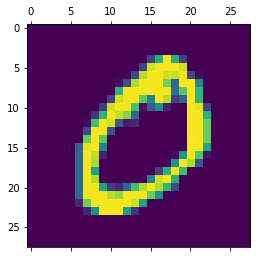

In [11]:
plt.matshow(X_train[1])

In [12]:
y_train[1]

0

### Flattening 2D array into 1D array

In [13]:
# pd.reshape()
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [14]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [16]:
#single image is now represented as 1-dimensional array
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Creating simple neural network with no hidden layers

In [17]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3925 - accuracy: 0.3034
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8954 - accuracy: 0.3438
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7708 - accuracy: 0.3711
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6479 - accuracy: 0.3875
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5853 - accuracy: 0.4009


Accuracy is low because we did not scale values in our data. Let's scale values and run the model again.

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4871 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3067 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.2860 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 2s 969us/step - loss: 0.2752 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.2680 - accuracy: 0.9255


After scaling the data the accuracy of the trained model is much better.

In [21]:
# Evaluating accuracy on the test dataset
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 820us/step - loss: 0.2729 - accuracy: 0.9244


[0.2728577256202698, 0.9243999719619751]

In [22]:
# Predictions for all the values in the test dataset
y_predicted = model.predict(X_test_flattened)

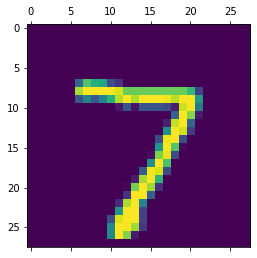

In [23]:
# First image in the test dataset 
plt.matshow(X_test[0])

In [24]:
# Prediction for the first image in the test dataset
y_predicted[0]

array([2.0036212e-05, 1.6518700e-10, 3.0838830e-05, 9.1319978e-03,
       1.1761288e-06, 9.0471789e-05, 9.9734010e-10, 7.2918475e-01,
       8.6504733e-05, 6.4125657e-04], dtype=float32)

In [25]:
# np.argmax() function finds the maximum value array and prints index of the maximum value 
# (in our case index of max value equals prediction)

np.argmax(y_predicted[0])

7

In [26]:
# list of predictions
y_predicted_labels = [np.argmax(i) for i in y_predicted]

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

### Buidling a confusion matrix

In predictive analytics, a table of confusion (sometimes also called a confusion matrix) is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy).

In [27]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    3,    5,    2,    1,    0],
       [   0, 1114,    2,    2,    0,    1,    4,    2,   10,    0],
       [  10,   10,  895,   32,   15,    2,   12,   10,   43,    3],
       [   4,    0,    7,  940,    1,   18,    2,    9,   23,    6],
       [   2,    1,    2,    1,  933,    0,   10,    3,    9,   21],
       [  12,    2,    2,   40,   12,  768,   15,    4,   31,    6],
       [  12,    3,    3,    2,    8,    9,  917,    2,    2,    0],
       [   2,    8,   18,   11,   10,    1,    0,  942,    5,   31],
       [  11,    8,    4,   27,   10,   24,    9,   10,  867,    4],
       [  11,    7,    1,   10,   44,    6,    0,   20,    9,  901]])>

Text(69.0, 0.5, 'Truth')

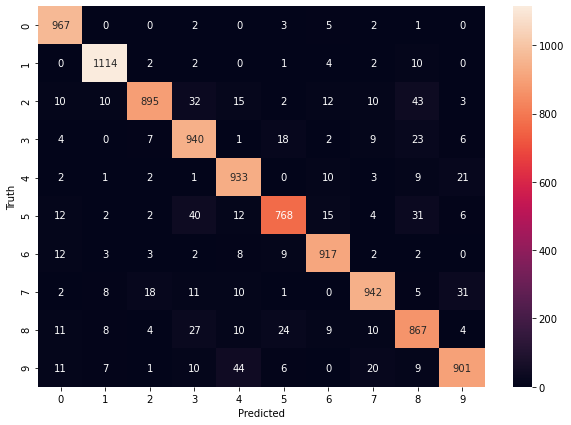

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

All numbers in confusion matrix which are not placed on the diagonal are errors (wrong predictions).

### Neural network with hidden layer

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='sigmoid')                    # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2902 - accuracy: 0.9182
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1374 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0997 - accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0625 - accuracy: 0.9809


Adding hidden layer generally tends to improve accuracyof the model.

In [31]:
# Evaluating the model on the test set
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 0.9752


[0.08338980376720428, 0.9751999974250793]

Text(69.0, 0.5, 'Truth')

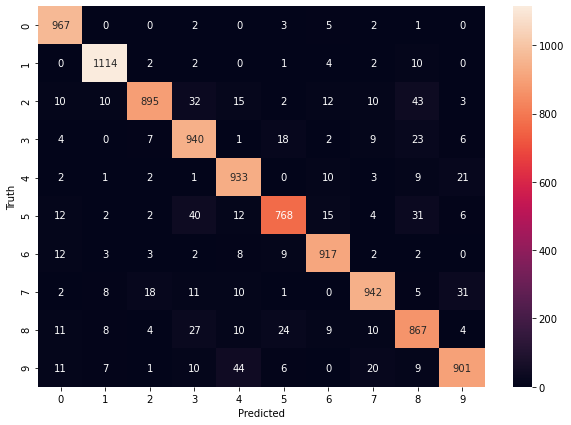

In [32]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### How to avoid creating flattened array (1D array) with pd.reshape() every time when building a model?

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # <------------------- keras.layers.Flatten()
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)            # <------------------- X_train instead of X_train_flattened

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.9178: 0s - loss: - ETA: 0s - loss: 0.3115 - 
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1374 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0974 - accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0753 - accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9811
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0493 - accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 10/10
1875/1875 [===================